### Initial Imports

In [232]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import traceback

# Potential Function Plotting (be sure to set to this in paper)

In [25]:
R1, R2 = 0.8, 1
k1, k2 = R1**2 + R2, R2
coll_model = lambda dist : k1 * np.exp(-np.power(dist, 2) / R1**2)
conn_model = lambda dist : k2 * np.exp(np.power(dist, 2) / R2**2)
model = lambda dist : coll_model(dist) + conn_model(dist)
coll_gradient = lambda dist : -2 * k1 * dist * np.exp(-np.power(dist, 2) / R1**2) / (R1**2)
conn_gradient = lambda dist : 2 * k2 * dist * np.exp(np.power(dist, 2) / R2**2) / (R2**2)
gradient = lambda dist : coll_gradient(dist) + conn_gradient(dist)

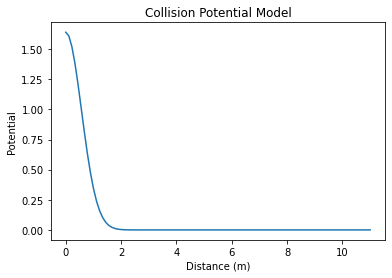

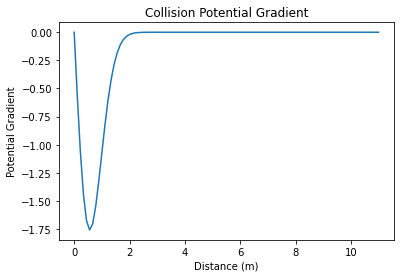

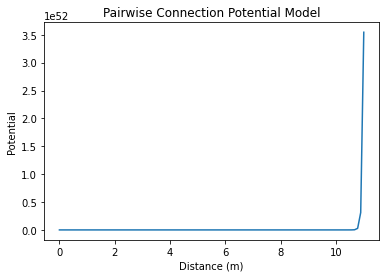

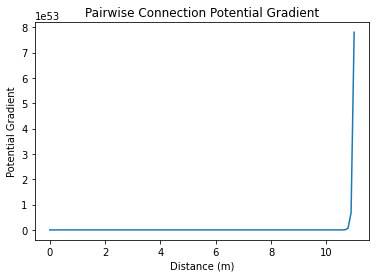

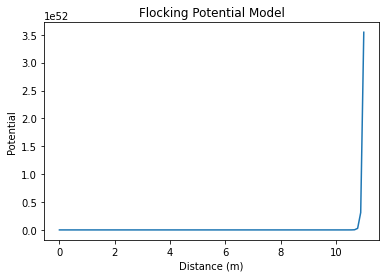

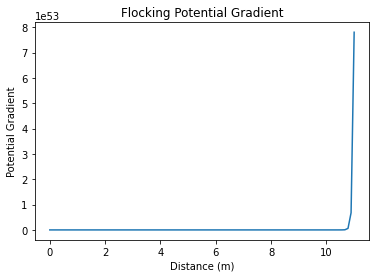

In [26]:
dist = np.linspace(0, R2 + 10, num=int(R2*100))
plt.plot(dist, coll_model(dist))
plt.title("Collision Potential Model")
plt.xlabel("Distance (m)")
plt.ylabel("Potential")
plt.show()

plt.plot(dist, coll_gradient(dist))
plt.title("Collision Potential Gradient")
plt.xlabel("Distance (m)")
plt.ylabel("Potential Gradient")
plt.show()

plt.plot(dist, conn_model(dist))
plt.title("Pairwise Connection Potential Model")
plt.xlabel("Distance (m)")
plt.ylabel("Potential")
plt.show()

plt.plot(dist, conn_gradient(dist))
plt.title("Pairwise Connection Potential Gradient")
plt.xlabel("Distance (m)")
plt.ylabel("Potential Gradient")
plt.show()

plt.plot(dist, model(dist))
plt.title("Flocking Potential Model")
plt.xlabel("Distance (m)")
plt.ylabel("Potential")
plt.show()

plt.plot(dist, gradient(dist))
plt.title("Flocking Potential Gradient")
plt.xlabel("Distance (m)")
plt.ylabel("Potential Gradient")
plt.show()

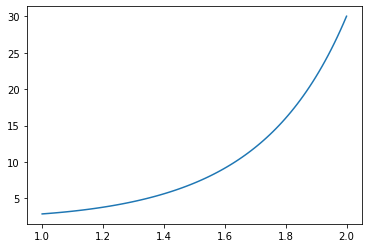

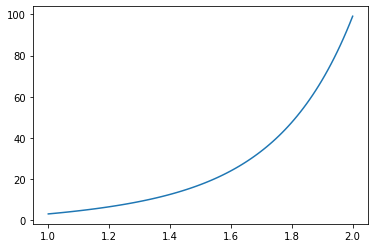

In [22]:
dist = np.linspace(1, 2, num=100)
plt.plot(dist, model(dist))
plt.show()
plt.plot(dist, gradient(dist))
plt.show()

In [4]:
# breadcrumbing, flocking but your neighbors are decided by openwsn

# Connectivity

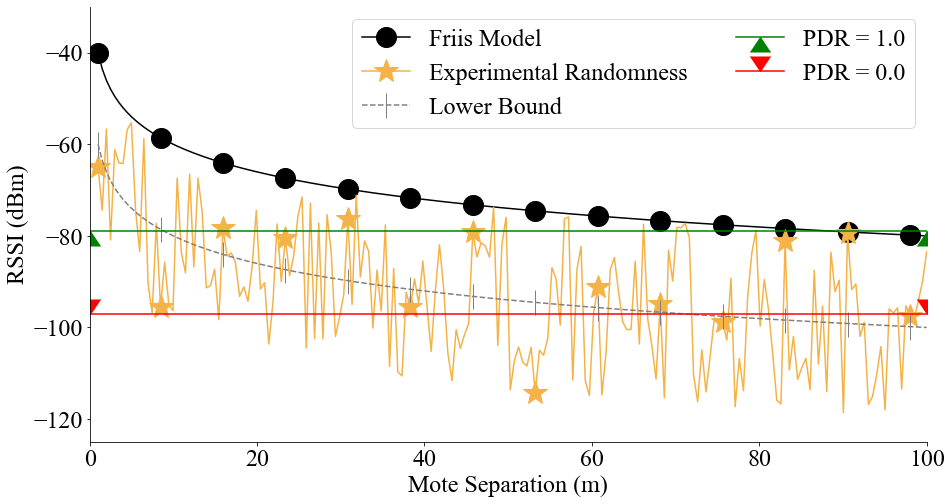

In [31]:
weight = 0.8

SPEED_OF_LIGHT = 3e8
TWO_DOT_FOUR_GHZ = 2.4e9

prx = lambda d : 20 * np.log10(SPEED_OF_LIGHT / (4 * np.pi * d * TWO_DOT_FOUR_GHZ)) # 0 - (20 * np.log10(d / (1000) * 2.4) + 92.45)
prx_rand = lambda d : prx(d) - 40 * np.random.rand(*d.shape)
prx_worst = lambda d, w=1 : prx(d) - w * 40

dists = np.linspace(1, 100, num=200)

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "24"
plt.rcParams['figure.figsize'] = 13, 8
# plt.gcf().set_size_inches(10.5, 14.5)
fig = plt.figure(figsize=(15,8)) 
ax = fig.add_subplot(111)
# plt.tight_layout(w_pad=0.1)


x,y = np.meshgrid(np.linspace(-5, 105, num=300), np.linspace(-125, -35, num=300))
#plt.imshow(((y > -101+15)).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Greens", alpha = 0.3);
# plt.imshow(((y >= -101) & (y <= -101+15)).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Greys", alpha = 0.15);
#plt.imshow(((y < -101)).astype(int), extent=(x.min(),x.max(),y.min(),y.max()), origin="lower", cmap="Reds", alpha = 0.3);

plt.plot(dists, prx(dists), color="black", label="Friis Model", marker="o", markevery=15,markersize=20)
plt.plot(dists, prx_rand(dists), color="#f4b247", label="Experimental Randomness", marker="*", markevery=15,markersize=25)
# plt.plot(dists, prx_worst(dists, 0.5), ":", color="black", label="Friis Model + Pister Hack (Average)", marker="s", markevery=15,markersize=20)
#plt.plot(dists, prx_worst(dists, weight), "-.", label=f"Pister Hack (Weighted {weight})")
plt.plot(dists, prx_worst(dists, 0.5), "--", color="grey", label="Lower Bound", marker="|", markevery=15,markersize=25)
plt.axhline(y=-79, color="green", label="PDR = 1.0", marker=6, markevery=1,markersize=20)
plt.axhline(y=-97, color="red", label="PDR = 0.0", marker=7, markevery=1,markersize=20)
#plt.axvline(x=3)
plt.legend(ncol=2)
plt.xlabel("Mote Separation (m)")
plt.ylabel("RSSI (dBm)")
# plt.title("2.4 GHz Range RF Propagation Model")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_ylim([-125,-30])
ax.set_xlim([0,100])
# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

fig.savefig("pister.pdf", dpi=400)
# plt.gcf().set_size_inches(18.5, 10.5)

In [30]:
iprx = lambda rssi, off: SPEED_OF_LIGHT / (4 * np.pi * np.power(10, (rssi + off) / 20) * TWO_DOT_FOUR_GHZ)
iprx(-97, 40)

-96.99991743496412

# Monte Carlo Plots (SwarmCommSim)

### Mean Velocity Plotting

In [233]:
def get_mean_vels(scenario = "edge_line_flock", model = "friis_upper",
                  flock_rad = 10, flock_vel = 5, num_agents = 11,
                  seed=0, axis=1, group="custom"):
    base = f'./outputs/csv/{group}/{scenario}/{seed}/{model}-{float(flock_rad)}-{float(flock_vel)}'
    dfp=pd.read_csv(f"{base}-pos.dat", sep=',',header=None)
    dfv=pd.read_csv(f"{base}-vel.dat", sep=',',header=None)
    dfp.values.shape, dfv.values.shape
    
    fp = np.array([np.fromstring(p[0], dtype=float, sep=" ") for p in dfp.values])
    fv = np.array([np.fromstring(v[0], dtype=float, sep=" ") for v in dfv.values])
    
    positions = np.reshape(fp, (-1, num_agents, 3))[:, :, :2]
    velocities = np.reshape(fv, (-1, num_agents, 3))[:, :, :2]
    
    # plt.plot(velocities.mean(axis=1))
    
    vels = velocities.mean(axis=axis)
    vels_std = velocities.std(axis=axis)
    
    return vels, vels_std

pister_hack 40 123
pister_hack 40 125
pister_hack 40 127
pister_hack 40 128
pister_hack 40 129
pister_hack 40 130
pister_hack 40 131
pister_hack 40 132
pister_hack 40 133
pister_hack 80 122
pister_hack 80 123
pister_hack 80 124
pister_hack 80 125
pister_hack 80 126
pister_hack 80 127
pister_hack 80 128
pister_hack 80 129
pister_hack 80 130
pister_hack 80 131
pister_hack 80 132
pister_hack 80 133


Traceback (most recent call last):
  File "<ipython-input-236-ec9b8525d3e7>", line 21, in <module>
    vels, vels_std = get_mean_vels(scenario = scenario_arguments[0], model = model,
  File "<ipython-input-233-a153ea960b21>", line 12, in get_mean_vels
    positions = np.reshape(fp, (-1, num_agents, 3))[:, :, :2]
  File "<__array_function__ internals>", line 5, in reshape
  File "/Users/felipecampos/anaconda3/envs/agent-sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 299, in reshape
    return _wrapfunc(a, 'reshape', newshape, order=order)
  File "/Users/felipecampos/anaconda3/envs/agent-sim/lib/python3.8/site-packages/numpy/core/fromnumeric.py", line 58, in _wrapfunc
    return bound(*args, **kwds)
ValueError: cannot reshape array of size 7380 into shape (9,3)
Traceback (most recent call last):
  File "<ipython-input-236-ec9b8525d3e7>", line 21, in <module>
    vels, vels_std = get_mean_vels(scenario = scenario_arguments[0], model = model,
  File "<ipython-input-233-a1

Text(0.5, 1.0, 'Average Velocity for Different Flocking Radii')

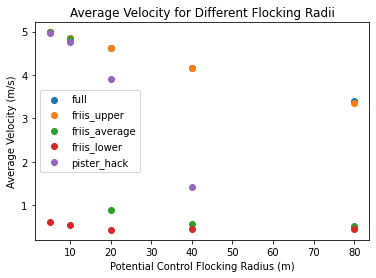

In [236]:
seed_start = 122
seed_end = seed_start + 12 # result from os.cpu_count() == 12 where data was generated, usually 12

scenario_arguments = ["edge_line_flock"]
comms_arguments = ["full", "friis_upper", "friis_average", "friis_lower", "pister_hack"]
spacing = [2.0]
FLOCK_START, FLOCK_END = 5, 100
flock_rads = [5, 10, 20, 40, 80] # list(np.linspace(FLOCK_START, FLOCK_END, FLOCK_END - FLOCK_START + 1))
flock_vels = [5.0] # [1, 5, 10, 20, 50]
follow_bools = [1] # [0, 1]
num_agents = [10]

run_id = "2021-02-22_01412_lonely_agent_velo_move"

for model in comms_arguments:
    spaced_vels = []
    for rad in flock_rads:
        vels_arr = []
        for seed in range(seed_start, seed_end):
            try:
                vels, vels_std = get_mean_vels(scenario = scenario_arguments[0], model = model,
                          flock_rad = rad, flock_vel = flock_vels[0], num_agents = num_agents[0]-1,
                          seed=seed, axis=1, group=f"monte_carlo/{run_id}")
                vels_arr.append(np.mean(np.sqrt(np.power(vels.T[0], 2) + np.power(vels.T[1], 2))))
            except:
                print(model, rad, seed)
                traceback.print_exc()
        spaced_vels.append(np.mean(np.array(vels_arr)))
        
    plt.scatter(spacings, spaced_vels, label=model)
    
plt.legend()
plt.xlabel("Potential Control Flocking Radius (m)")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity for Different Flocking Radii")

In [194]:
# also test update rate as a function of slots (every step, every n steps, every slotframe)
# ignore these edge cases --> merging networks is really hard

# 1) test average velocities [-] --> flocking, FTL, breadcrumbing, ...
# 2) test different control update rates relative to slotframe --> relative to # agents
# 3) ATLAS exploration under communication constraints
# ^^ all of these

Text(0.5, 1.0, 'Average Velocity for Different Flocking Radii')

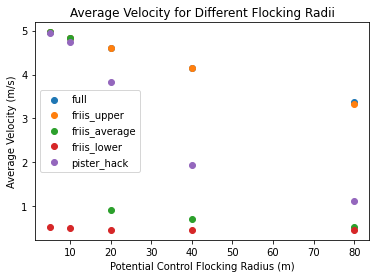

In [195]:
for model in ["full", "friis_upper", "friis_average", "friis_lower", "pister_hack"]:
    spacings = [5, 10, 20, 40, 80]
    spaced_vels = []
    for spacing in spacings:
        vels, vels_std = get_mean_vels(model=model, spacing=str(spacing))
        spaced_vels.append(np.mean(np.sqrt(np.power(vels.T[0], 2) + np.power(vels.T[1], 2))))
        
    plt.scatter(spacings, spaced_vels, label=model)
    
plt.legend()
plt.xlabel("Potential Control Flocking Radius (m)")
plt.ylabel("Average Velocity (m/s)")
plt.title("Average Velocity for Different Flocking Radii")

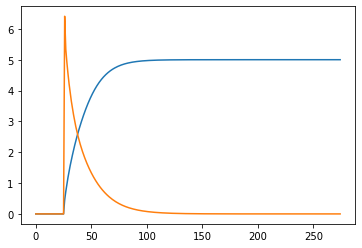

In [182]:
plt.plot(get_mean_vels(model="full", spacing="5"))

In [216]:
vels, vels_std = get_mean_vels(scenario="center_line_flock", model="friis_average",
                               flock_rad=10.0, flock_vel=5.0, seed=5,
                               group="monte_carlo/69", num_agents=5,
                              )

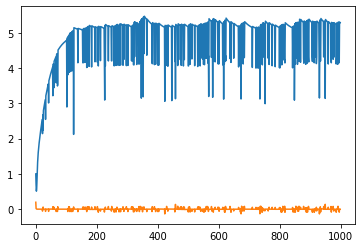

In [217]:
plt.plot(vels)

In [218]:
vels, vels_std = get_mean_vels(scenario="center_line_flock", model="pister_hack",
                               flock_rad=10.0, flock_vel=5.0, seed=5,
                               group="monte_carlo/69", num_agents=5,
                              )

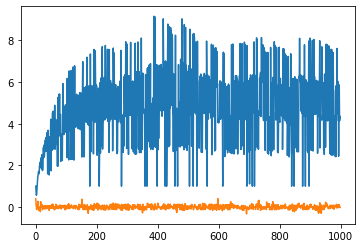

In [219]:
plt.plot(vels)